In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
sns.set()

#Preprocessing Libraries
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split

In [2]:
 pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv("/Users/admin/Desktop/train.csv")
test_df = pd.read_csv("/Users/admin/Desktop/test_with_no_labels.csv")
df.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
from nltk.corpus import stopwords

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# DATA CLEANING 

In [7]:
from nltk.corpus import stopwords

In [8]:
#listing english stopwords
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
#listing sentiments 
sentiment_labels = list(df.sentiment.unique())
print(sentiment_labels)

[1, 2, 0, -1]


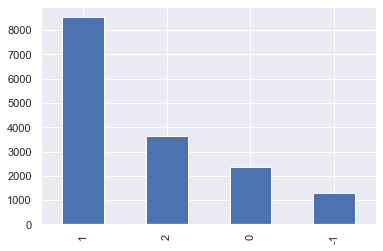

In [10]:
#seeing how sentiment count is distributed 
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()  #Plotting number of climate change sentiments in each group

In [11]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Remove punctuation in message

In [12]:

import re 
def remove_punct(message):
    new_words = []
    for word in message:
        w = re.sub(r'[^\w\s]','',word) #remove everything except words and space
        w = re.sub(r'_','',w) #how to remove underscore as well
        new_words.append(w)
    return new_words


In [13]:
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [14]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [15]:
df['tokens'].iloc[2] 

['RT',
 '@',
 'RawStory',
 ':',
 'Researchers',
 'say',
 'we',
 'have',
 'three',
 'years',
 'to',
 'act',
 'on',
 'climate',
 'change',
 'before',
 'it’s',
 'too',
 'late',
 'https',
 ':',
 '//t.co/WdT0KdUr2f',
 'https',
 ':',
 '//t.co/Z0ANPT…']

Data contains website pages or links, from tokenization 
Remove websites as they add no value 

In [16]:
df['message'] = df['message'].replace(to_replace=r'^https?:\/\/.*[\r\n]*',value='',regex=True)

Stemming the words

In [17]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

In [18]:
 words = 'caring cares cared caringly carefully'

In [19]:
# find the stem of each word in words
stemmer = SnowballStemmer('english')
for word in words.split():
    print(stemmer.stem(word))

care
care
care
care
care


In [20]:
def df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [21]:
df['stemmed'] = df['tokens'].apply(lambda x: [stemmer.stem(y) for y in x]) # Stem every word.
df.head() # Print dataframe

,sentiment,message,tweetid,tokens,stemmed
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...","[polyscimajor, epa, chief, doe, n't, think, ca..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...","[it, 's, not, like, we, lack, evid, of, anthro..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...","[rt, @, rawstori, :, research, say, we, have, ..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[#, todayinmak, #, wire, :, 2016, was, a, pivo..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[rt, @, soynoviodetoda, :, it, 's, 2016, ,, an..."


In [22]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("ran",'v'))

[nltk_data] Downloading package wordnet to /Users/admin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


cat
cactus
goose
rock
python
good
best
run
run


In [23]:
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [24]:
df['lemma'] = df['tokens'].apply(df_lemma, args=(lemmatizer, ))

In [25]:
df.head()

,sentiment,message,tweetid,tokens,stemmed,lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...","[polyscimajor, epa, chief, doe, n't, think, ca...","[PolySciMajor, EPA, chief, doe, n't, think, ca..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...","[it, 's, not, like, we, lack, evid, of, anthro...","[It, 's, not, like, we, lack, evidence, of, an..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...","[rt, @, rawstori, :, research, say, we, have, ...","[RT, @, RawStory, :, Researchers, say, we, hav..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[#, todayinmak, #, wire, :, 2016, was, a, pivo...","[#, TodayinMaker, #, WIRED, :, 2016, wa, a, pi..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[rt, @, soynoviodetoda, :, it, 's, 2016, ,, an...","[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a..."


Checking results of lemmatization

# BAG OF WORDS

In [26]:
def bag_of_words_count(words, word_dict={}):
    """ this function takes in a list of words and returns a dictionary 
        with each word as a key, and the value represents the number of 
        times that word appeared"""
    for word in words:
        if word in word_dict.keys():
            word_dict[word] += 1
        else:
            word_dict[word] = 1
    return word_dict

In [27]:
sentiments = {}
for sentim in sentiment_labels:
    df2 = df.groupby('sentiment')
    sentiments[sentim] = {}
    for row in df2.get_group(sentim)['message']:
        sentiments[sentim] = bag_of_words_count(row, sentiments[sentim])    

In [28]:
all_words = set()
for sentim in sentiment_labels:
    for word in sentiments[sentim]:
        all_words.add(word)

In [29]:
sentiments['all'] = {}
for sentim in sentiment_labels:
    for word in all_words:
        if word in sentiments[sentim].keys():
            if word in sentiments['all']:
                sentiments['all'][word] += sentiments[sentim][word]
            else:
                sentiments['all'][word] = sentiments[sentim][word]

In [30]:
total_words = sum([v for v in sentiments['all'].values()])
print(total_words)

1956455


Text(0.5, 0, 'word frequency')

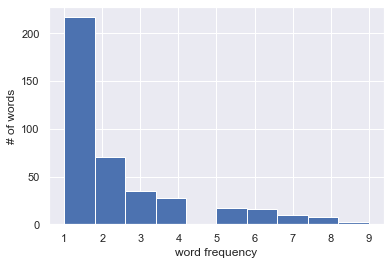

In [31]:
_ = plt.hist([v for v in sentiments['all'].values() if v < 10],bins=10)
plt.ylabel("# of words")
plt.xlabel("word frequency") 

#more words appear once only out of 1.9. millions times

In [32]:
len([v for v in sentiments['all'].values() if v == 1])#total 

217

In [33]:
rare_words = [k for k, v in sentiments['all'].items() if v==1]
print(rare_words[:100])

['⏰', '✊', 'м', 'п', '😬', '«', '🦋', '🙋', '🐞', '🌻', '🌤', '💪', '🌴', '►', '±', '―', '🦄', '👀', '🌲', '🙌', '😑', '🏔', '🕊', '🐾', '⛄', '🇨', 'ь', 'ª', '🐧', '，', '🇦', '🌈', '📝', 'ю', '😨', '😌', '😞', '🌱', '²', 'щ', '⃣', '✅', '🤰', 'ö', '☹', 'ツ', '🔫', '👍', 'ฉ', '⏳', '☎', '😠', '🕣', '💖', '🍄', '：', '🌳', 'く', 'ë', 'ま', '受', '影', '響', 'и', 'ट', '）', '欧', '⬆', 'け', '📢', 'ै', '😏', '報', 'き', '👑', '警', '州', 'す', 'т', 'Н', '最', 'も', 'が', '（', 'в', '\u200c', '通', 'ड', '算', 'Ｋ', '時', 'オ', '命', 'श', 'Ｈ', 'è', 'ธ', '話', '😎', 'え']


In [34]:
# how many words appear more than 10 times?
# how many words of the total does that account for?
print(len([v for v in sentiments['all'].values() if v >= 10]))
occurs_more_than_10_times = sum([v for v in sentiments['all'].values() if v >= 10])
print(occurs_more_than_10_times)

144
1955548


In [35]:
occurs_more_than_10_times/total_words

0.9995364064085297

In [36]:
max_count = 10
remaining_word_index = [k for k, v in sentiments['all'].items() if v > max_count]

In [37]:
occurs_more_than_10_times/total_words

0.9995364064085297

# ngram

In [38]:
from nltk.util import ngrams

In [39]:
def word_grams(words, min_n=1, max_n=4):
    s = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            s.append(' '.join(str(i) for i in ngram))
    return s

In [40]:
print (word_grams('one two three four'.split(' ')))

['one', 'two', 'three', 'four', 'one two', 'two three', 'three four', 'one two three', 'two three four']


In [41]:
[x for x in ngrams(df.iloc[55]['tokens'], 2)]

[('RT', '@'),
 ('@', 'kelkulus'),
 ('kelkulus', ':'),
 (':', 'Irony'),
 ('Irony', ':'),
 (':', 'Florida'),
 ('Florida', ','),
 (',', 'a'),
 ('a', 'state'),
 ('state', 'in'),
 ('in', 'danger'),
 ('danger', 'of'),
 ('of', 'being'),
 ('being', 'washed'),
 ('washed', 'away'),
 ('away', 'due'),
 ('due', 'to'),
 ('to', 'rising'),
 ('rising', 'sea'),
 ('sea', 'levels'),
 ('levels', ','),
 (',', 'just'),
 ('just', 'elected'),
 ('elected', 'a'),
 ('a', 'guy'),
 ('guy', 'who'),
 ('who', 'denies'),
 ('denies', 'climate'),
 ('climate', 'changeÃ¢â‚¬Â¦')]

# Vectorization

In [42]:
from sklearn.feature_extraction.text import CountVectorizer

In [43]:
vect = CountVectorizer()
vect.fit(df['message'])

CountVectorizer()

In [44]:
vect = CountVectorizer(stop_words='english')

In [45]:
vect = CountVectorizer(ngram_range=(1, 2))

In [46]:
vect = CountVectorizer(max_df=0.5)

In [47]:
vect = CountVectorizer(min_df=2)

In [48]:
betterVect = CountVectorizer(stop_words='english',
                             min_df=2,
                             max_df=0.5,
                             ngram_range=(1, 1))

In [49]:
betterVect.fit(df['message'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

In [50]:
df.head()

,sentiment,message,tweetid,tokens,stemmed,lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...","[polyscimajor, epa, chief, doe, n't, think, ca...","[PolySciMajor, EPA, chief, doe, n't, think, ca..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...","[it, 's, not, like, we, lack, evid, of, anthro...","[It, 's, not, like, we, lack, evidence, of, an..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...","[rt, @, rawstori, :, research, say, we, have, ...","[RT, @, RawStory, :, Researchers, say, we, hav..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...","[#, todayinmak, #, wire, :, 2016, was, a, pivo...","[#, TodayinMaker, #, WIRED, :, 2016, wa, a, pi..."
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...","[rt, @, soynoviodetoda, :, it, 's, 2016, ,, an...","[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a..."


# EDA

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
 3   tokens     15819 non-null  object
 4   stemmed    15819 non-null  object
 5   lemma      15819 non-null  object
dtypes: int64(2), object(4)
memory usage: 741.6+ KB


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

Text(0, 0.5, 'Density')

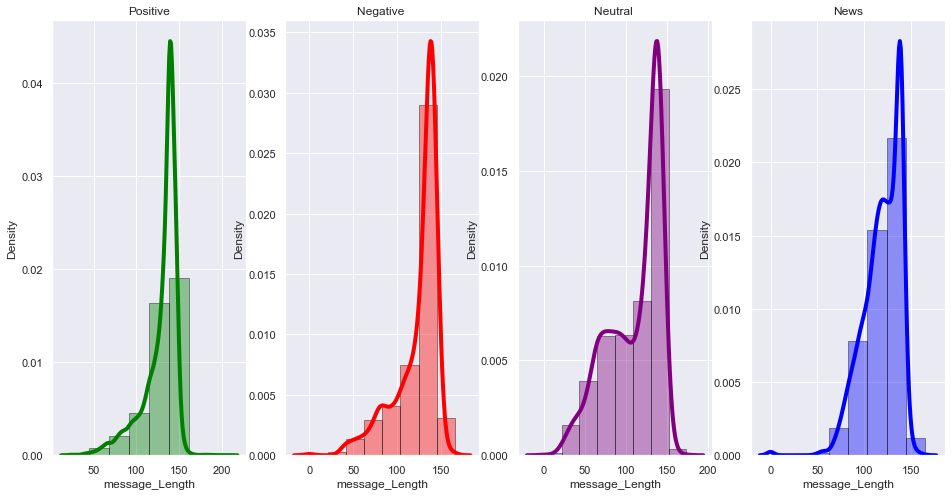

In [52]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(df[df['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(df[df['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'red', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(df[df['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(df[df['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

The high word density (0.04) seen in the group of people with positive sentinments/believers of climate change is no suprise at all which could mean that they have more to say on a tweet about climate change, probably because their tweets are backed up by scientific facts of which they include in the tweet itself wherease all the other sentiment classes have a lower word density as compared to the positive sentiment class. 

In [53]:
working_df = df.copy()
# Labeling the target
working_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in working_df['sentiment']]


In [54]:
believer_df = df[df.sentiment==1]
denier_df = df[df.sentiment==-1]
neutral_df = df[df.sentiment==0]
news_df = df[df.sentiment==2]

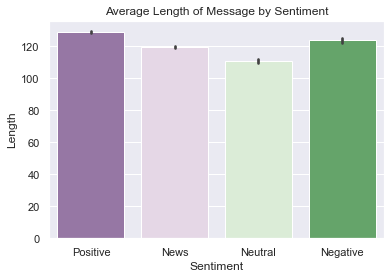

In [55]:
# Visualizing text lengths for each sentiment#average text length of each sentiment
sns.barplot(x='sentiment', y=working_df['message'].apply(len) ,data = working_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()


The average length of the positive sentiments about climate change shows to be longer than those of other sentiment classes which agrees with the above markdown made about positive sentiments.

In [56]:
# Extracting Users in a column
working_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in working_df.message]

# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

In [57]:
# Generating Counts of users
counts = working_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [58]:
# Top 5 most popular
counts.head(5)

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


Top 5 tweets come from influential people. Bernie Sanders is an american activist who recently ran for president in 2020, his views on climate change are positive, he believes in climate change and changing towards using green energy.Stephen Schlegel is a well known business man in the health industry, Donald trum is the former president of the USA while CNN is a well known national news channel in USA. Which shows that climate change is a topic of concern to highly influential people/companies, if their views are seen on social media(tweeter) this can influence the way people generally perceive climate change and therefore people that are influential such as Bernie Sanders can affect how most people percieve climate change and products associated with it, as far as marketing strategies are involved, involving influential people is an advantage. 

In [59]:
# Creating a column of hastags
working_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in working_df.message]

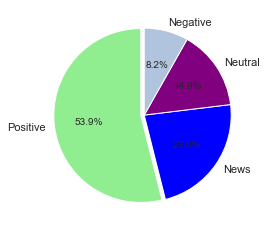

In [60]:
# checking the numerical distribution of sentiments 
values = working_df['sentiment'].value_counts()/working_df.shape[0]
labels = (working_df['sentiment'].value_counts()/working_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.04, 0, 0, 0), colors=colors)
plt.show()

In [101]:
believer_df = df[df.sentiment==1]
denier_df = df[df.sentiment==-1]
neutral_df = df[df.sentiment==0]
news_df = df[df.sentiment==2]

In [115]:
def create_corpus(sentiment):
    corpus=[]
    
    for x in tweet[tweet['sentiment']==target]['message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

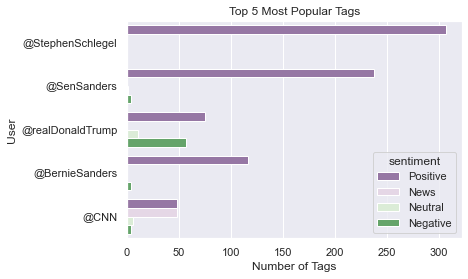

In [116]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=working_df, palette='PRGn',
              order=working_df.users.value_counts().iloc[:5].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 5 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

In [122]:
from collections import  Counter
stop=set(stopwords.words('english'))

In [131]:
def create_corpus(sentiment):
    corpus=[]
    
    for x in df[df['sentiment']==sentiment]['message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [133]:
from collections import defaultdict

In [134]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

<BarContainer object of 5 artists>

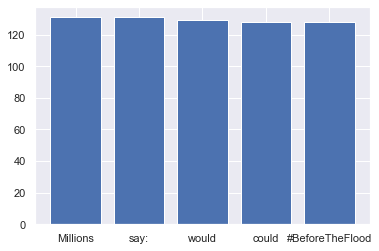

In [169]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if (word not in stop):
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[60:65] 
    


x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 5 artists>

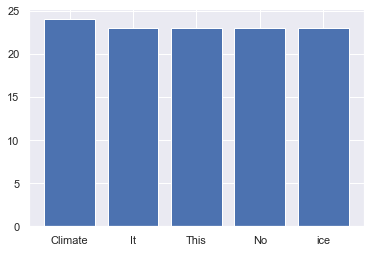

In [170]:
corpus=create_corpus(-1)

dic=defaultdict(int)
for word in corpus:
    if (word not in stop):
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[60:65] 
    


x,y=zip(*top)
plt.bar(x,y)

In [138]:
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

<AxesSubplot:>

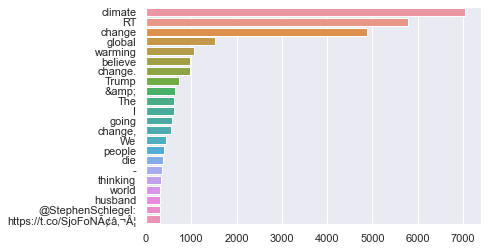

In [139]:
sns.barplot(x=y,y=x)

# TRAINING THE MODEL

In [62]:
# labels
y = df["message"]

# features
X = df.drop('sentiment', axis=1)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X = df['message']
y = df['sentiment']

In [65]:
X.shape

(15819,)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vect = TfidfVectorizer(ngram_range=(1,3), max_df =0.8 ,min_df = 3)

In [69]:
X_train_cv = vect.fit_transform(X_train)
X_test_cv  = vect.transform(X_test) 

In [70]:
X_train.shape, X_test.shape

((12655,), (3164,))

In [71]:
from sklearn.svm import LinearSVC

In [72]:
clf = LinearSVC()
clf.fit(X_train_cv, y_train)

LinearSVC()

In [73]:
y_pred = clf.predict(X_test_cv)

In [74]:
from sklearn.metrics import classification_report, accuracy_score

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.66      0.43      0.52       249
           0       0.59      0.42      0.49       473
           1       0.77      0.86      0.81      1701
           2       0.75      0.79      0.77       741

    accuracy                           0.74      3164
   macro avg       0.69      0.62      0.65      3164
weighted avg       0.73      0.74      0.73      3164



# SUBMISSION ON KAGGLE

In [76]:
daf2 = pd.read_csv("/Users/admin/Desktop/test_with_no_labels.csv")

In [77]:
X_test_final = daf2.message
X_train_final = df.message
y = df.sentiment

In [78]:
cd_train_final = vect.fit_transform(X_train_final)
cd_test_final = vect.transform(X_test_final)

In [79]:
clf.fit(cd_train_final,y)

LinearSVC()

In [80]:
y_pred_kaggle = clf.predict(cd_test_final)

In [81]:
df_k = pd.DataFrame(y_pred_kaggle, columns = ['sentiment'])


In [82]:
output = pd.DataFrame({"tweetid": daf2.tweetid,"sentiment":df_k.sentiment})
output.to_csv('latest. 1.csv', index = False)

In [83]:
df_k.shape

(10546, 1)

Kaggle submission score 0.759

# Testing different models on unbalanced data 

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# SVM

In [85]:
from sklearn.datasets import make_gaussian_quantiles

# Set the feature dimensionality
p = 2

# Construct the dataset
X, y = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=p,
                                 n_classes=2, random_state=1)

In [86]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))


The accuracy score of the SVC is: 0.6133333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.58      0.83      0.68       150
           1       0.70      0.39      0.50       150

    accuracy                           0.61       300
   macro avg       0.64      0.61      0.59       300
weighted avg       0.64      0.61      0.59       300



<ipython-input-88-64bdac1c15c9>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))


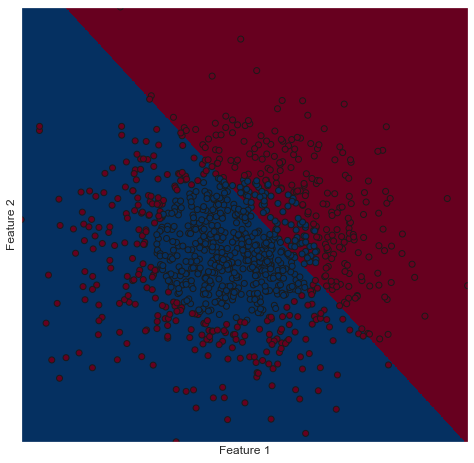

In [88]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)

x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

In [89]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n",classification_report(y_test, y_pred))


The accuracy score of the SVC is: 0.9833333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.98      0.99      0.98       150
           1       0.99      0.98      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [90]:
parameters = {'kernel':('linear', 'rbf'),
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [91]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

In [92]:
y_opt = clf.predict(X_test)
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))

The accuracy for our tuned model is:  0.9666666666666667


In [93]:
clf.best_params_

{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}

# Decision Trees

In [94]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [95]:
y = df['sentiment']
X = df.drop('sentiment', axis=1)